In [25]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

In [26]:
df = pd.read_csv('Resources/US_French_Chardonnays.csv')
df.head()

,ID,alcohol,category,country,description,designation,price,price_bins,rating,rating_bin,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,4,14.1,White,US,This white has an expert level of intensity an...,Dutton Ranch Walker Hill Vineyard,50.0,$25-$50,94,91-100,California,Sonoma,Green Valley,Dutton-Goldfield 2016 Dutton Ranch Walker Hill...,https://www.winemag.com/buying-guide/dutton-go...,Chardonnay,2016,Dutton-Goldfield
1,53,13.8,White,US,"This is a structured and remarkable wine, burs...",Year of the Monkey Single Vineyard,60.0,$51-$100,94,91-100,California,Napa-Sonoma,Carneros,Donum 2016 Year of the Monkey Single Vineyard ...,https://www.winemag.com/buying-guide/donum-201...,Chardonnay,2016,Donum
2,74,14.7,White,US,"This is a grainy, structured and textured whit...",Lewis MacGregor Estate Vineyard,65.0,$51-$100,94,91-100,California,Sonoma,Russian River Valley,Williams Selyem 2016 Lewis MacGregor Estate Vi...,https://www.winemag.com/buying-guide/williams-...,Chardonnay,2016,Williams Selyem
3,156,14.4,White,US,This has gorgeous aromas of ginger and crushed...,Gap's Crown,58.0,$51-$100,95,91-100,California,Sonoma,Sonoma Coast,Black Kite 2016 Gap's Crown Chardonnay (Sonoma...,https://www.winemag.com/buying-guide/black-kit...,Chardonnay,2016,Black Kite
4,169,14.5,White,US,This lovely vineyard-designate is expertly put...,Toyon Vineyard,125.0,$100+,95,91-100,California,Napa-Sonoma,Los Carneros,Alpha Omega 2015 Toyon Vineyard Chardonnay (Lo...,https://www.winemag.com/buying-guide/alpha-ome...,Chardonnay,2015,Alpha Omega


In [27]:
df = df.drop(['ID', 'alcohol', 'category', 'price', 'rating_bin', 'description', 'designation', 'title', 'url', 'varietal', 'vintage','winery'], axis=1)
df.head()


,country,price_bins,rating,region,subregion,subsubregion
0,US,$25-$50,94,California,Sonoma,Green Valley
1,US,$51-$100,94,California,Napa-Sonoma,Carneros
2,US,$51-$100,94,California,Sonoma,Russian River Valley
3,US,$51-$100,95,California,Sonoma,Sonoma Coast
4,US,$100+,95,California,Napa-Sonoma,Los Carneros


In [28]:
df = df.dropna(subset=['subsubregion'])
df

,country,price_bins,rating,region,subregion,subsubregion
0,US,$25-$50,94,California,Sonoma,Green Valley
1,US,$51-$100,94,California,Napa-Sonoma,Carneros
2,US,$51-$100,94,California,Sonoma,Russian River Valley
3,US,$51-$100,95,California,Sonoma,Sonoma Coast
4,US,$100+,95,California,Napa-Sonoma,Los Carneros
...,...,...,...,...,...,...
13683,US,$25-$50,90,California,Central Coast,Santa Lucia Highlands
13684,US,$0-$25,91,California,Central Coast,Santa Maria Valley
13685,US,$25-$50,92,California,Central Coast,Arroyo Seco
13686,US,$25-$50,92,California,Central Coast,Santa Barbara County


In [29]:
X_df = pd.DataFrame(df)
X_df['subregion'] = X_df['subregion'].astype(str)


In [30]:
X = X_df.drop("price_bins", axis=1)
y = df["price_bins"]

In [31]:
X= X.apply(LabelEncoder().fit_transform)
print(X)

       country  rating  region  subregion  subsubregion
0            0      14       0         14            44
1            0      14       0          9            15
2            0      14       0         14           103
3            0      15       0         14           127
4            0      15       0          9            57
...        ...     ...     ...        ...           ...
13683        0      10       0          1           118
13684        0      11       0          1           120
13685        0      12       0          1             8
13686        0      12       0          1           113
13687        0       2       0          1            53

[10668 rows x 5 columns]


In [32]:
X = X.values.astype("float32")
print(X)
# y = y.values.astype("float32")

[[  0.  14.   0.  14.  44.]
 [  0.  14.   0.   9.  15.]
 [  0.  14.   0.  14. 103.]
 ...
 [  0.  12.   0.   1.   8.]
 [  0.  12.   0.   1. 113.]
 [  0.   2.   0.   1.  53.]]


In [33]:
le = LabelEncoder()
le.fit(y)
print(y)
encoded_y = le.transform(y)
encoded_y

0         $25-$50
1        $51-$100
2        $51-$100
3        $51-$100
4           $100+
           ...   
13683     $25-$50
13684      $0-$25
13685     $25-$50
13686     $25-$50
13687      $0-$25
Name: price_bins, Length: 10668, dtype: object


array([2, 3, 3, ..., 2, 2, 0])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [35]:
le2 = LabelEncoder()
le2.fit(y_train)
encoded_y_train = le2.transform(y_train)
encoded_y_test = le2.transform(y_test)
encoded_y_test
# len(encoded_y_train)

array([2, 3, 2, ..., 0, 2, 2], dtype=int64)

In [36]:
X_train, x_val, y_train, y_val = train_test_split(X_train, encoded_y_train, random_state=42)

In [37]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
print(len(y_train_categorical))
len(X_train)

6000


6000

In [77]:
y_val_categorical = to_categorical(y_val)

In [38]:
scaler_model = StandardScaler()

In [39]:
X_scaler = scaler_model.fit(X_train)

In [40]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
input_dims = X_train.shape[1]
input_dims

5

In [42]:
model = Sequential()
model.add(Dense(8, activation = 'relu', input_dim=(input_dims)))
# model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=40,  verbose=1, validation_split=0.2)

Train on 4800 samples, validate on 1200 samples
Epoch 1/100
4800/4800 [==============================] - 1s 154us/step - loss: 1.3327 - accuracy: 0.4808 - val_loss: 1.2363 - val_accuracy: 0.6275
Epoch 2/100
4800/4800 [==============================] - 0s 51us/step - loss: 1.1512 - accuracy: 0.6467 - val_loss: 1.0587 - val_accuracy: 0.6433
Epoch 3/100
4800/4800 [==============================] - 0s 51us/step - loss: 0.9865 - accuracy: 0.6450 - val_loss: 0.9065 - val_accuracy: 0.6467
Epoch 4/100
4800/4800 [==============================] - 0s 50us/step - loss: 0.8608 - accuracy: 0.6500 - val_loss: 0.8026 - val_accuracy: 0.6575
Epoch 5/100
4800/4800 [==============================] - 0s 54us/step - loss: 0.7859 - accuracy: 0.6579 - val_loss: 0.7469 - val_accuracy: 0.6633
Epoch 6/100
4800/4800 [==============================] - 0s 49us/step - loss: 0.7481 - accuracy: 0.6594 - val_loss: 0.7219 - val_accuracy: 0.6667
Epoch 7/100
4800/4800 [==============================] - 0s 53us/step - los

4800/4800 [==============================] - 0s 59us/step - loss: 0.6851 - accuracy: 0.6769 - val_loss: 0.6859 - val_accuracy: 0.6717
Epoch 57/100
4800/4800 [==============================] - 0s 53us/step - loss: 0.6846 - accuracy: 0.6762 - val_loss: 0.6871 - val_accuracy: 0.6675
Epoch 58/100
4800/4800 [==============================] - 0s 53us/step - loss: 0.6849 - accuracy: 0.6787 - val_loss: 0.6866 - val_accuracy: 0.6708
Epoch 59/100
4800/4800 [==============================] - 0s 75us/step - loss: 0.6846 - accuracy: 0.6775 - val_loss: 0.6867 - val_accuracy: 0.6717
Epoch 60/100
4800/4800 [==============================] - 0s 57us/step - loss: 0.6845 - accuracy: 0.6781 - val_loss: 0.6874 - val_accuracy: 0.6708
Epoch 61/100
4800/4800 [==============================] - 0s 48us/step - loss: 0.6842 - accuracy: 0.6756 - val_loss: 0.6871 - val_accuracy: 0.6708
Epoch 62/100
4800/4800 [==============================] - 0s 53us/step - loss: 0.6843 - accuracy: 0.6760 - val_loss: 0.6868 - val_a

In [51]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.702196235664784, Accuracy: 0.6692913174629211


In [52]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = le.inverse_transform(encoded_predictions)

In [96]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {le.inverse_transform(list(y_test[:5]))}")
# print(f"X Values: {list(X_test[:5])}")

Predicted classes: ['$0-$25' '$25-$50' '$0-$25' '$0-$25' '$0-$25']
Actual Labels: ['$25-$50' '$51-$100' '$25-$50' '$0-$25' '$0-$25']


In [89]:
# model.save('modelChardonnays.h5')

In [54]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


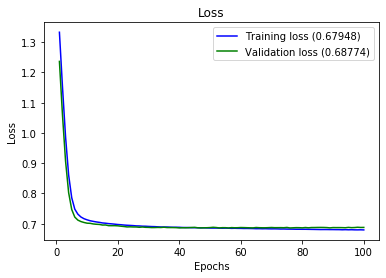

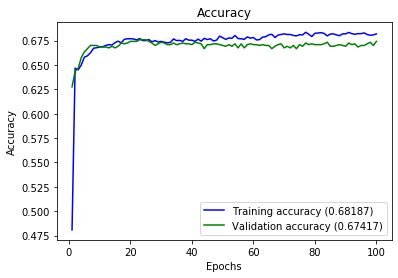

In [91]:
plot_history(history)

In [102]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.subplots(constrained_layout=True)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [103]:
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

In [100]:
le.inverse_transform(np.arange(4))

array(['$0-$25', '$100+', '$25-$50', '$51-$100'], dtype=object)

Accuracy : 0.4172913543228386

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       986
           1    0.00000   0.00000   0.00000         3
           2    0.41729   1.00000   0.58886       835
           3    0.00000   0.00000   0.00000       177

    accuracy                        0.41729      2001
   macro avg    0.10432   0.25000   0.14721      2001
weighted avg    0.17413   0.41729   0.24573      2001

[[  0   0 986   0]
 [  0   0   3   0]
 [  0   0 835   0]
 [  0   0 177   0]]


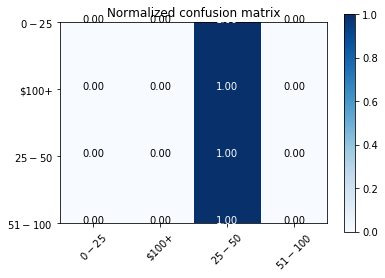

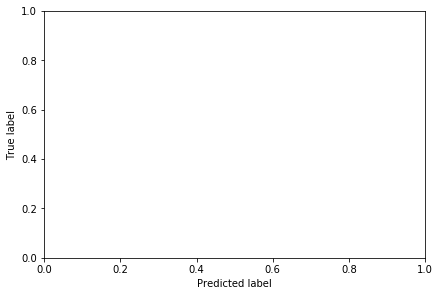

In [104]:
full_multiclass_report(model,
                       x_val,
                       y_val_categorical,
                       le.inverse_transform(np.arange(4)))

Accuracy : 0.6692913385826772

Classification Report
              precision    recall  f1-score   support

           0    0.70993   0.77575   0.74139      1262
           1    0.00000   0.00000   0.00000         7
           2    0.62578   0.68479   0.65396      1177
           3    0.00000   0.00000   0.00000       221

    accuracy                        0.66929      2667
   macro avg    0.33393   0.36514   0.34884      2667
weighted avg    0.61210   0.66929   0.63942      2667

[[979   0 283   0]
 [  0   0   7   0]
 [371   0 806   0]
 [ 29   0 192   0]]


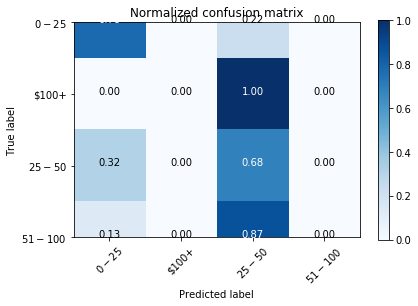

In [97]:
full_multiclass_report(model,
                       X_test_scaled,
                       y_test_categorical,
                       le.inverse_transform(np.arange(4)))

In [327]:
# GridSearch
def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='rmsprop'):
    model = Sequential()

    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
            model.add(Dense(lsize,
                            activation=activation,
                            input_shape=(5,)))
        else:
            model.add(Dense(lsize,
                            activation=activation))
            
    model.add(Dense(2,activation='sigmoid'))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,
                        epochs=100, 
                        batch_size=50,
                        verbose=2)

param_grid = {'dense_layers': [[8,8],[10,8],[8,6]],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[100,300],
              'batch_size':[15,40]}

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')

grid_results = grid.fit(X_train_scaled,y_train)

print('Parameters of the best model: ')
print(grid_results.best_params_)

Epoch 1/100
 - 0s - loss: 0.5474 - accuracy: 0.7310
Epoch 2/100
 - 0s - loss: 0.4481 - accuracy: 0.7585
Epoch 3/100
 - 0s - loss: 0.4318 - accuracy: 0.7730
Epoch 4/100
 - 0s - loss: 0.4261 - accuracy: 0.7810
Epoch 5/100
 - 0s - loss: 0.4230 - accuracy: 0.7860
Epoch 6/100
 - 0s - loss: 0.4210 - accuracy: 0.7908
Epoch 7/100
 - 0s - loss: 0.4186 - accuracy: 0.7910
Epoch 8/100
 - 0s - loss: 0.4179 - accuracy: 0.7895
Epoch 9/100
 - 0s - loss: 0.4165 - accuracy: 0.7937
Epoch 10/100
 - 0s - loss: 0.4155 - accuracy: 0.7925
Epoch 11/100
 - 0s - loss: 0.4147 - accuracy: 0.7955
Epoch 12/100
 - 0s - loss: 0.4137 - accuracy: 0.7928
Epoch 13/100
 - 0s - loss: 0.4125 - accuracy: 0.7962
Epoch 14/100
 - 0s - loss: 0.4129 - accuracy: 0.7965
Epoch 15/100
 - 0s - loss: 0.4117 - accuracy: 0.7955
Epoch 16/100
 - 0s - loss: 0.4120 - accuracy: 0.7910
Epoch 17/100
 - 0s - loss: 0.4113 - accuracy: 0.7965
Epoch 18/100
 - 0s - loss: 0.4109 - accuracy: 0.7955
Epoch 19/100
 - 0s - loss: 0.4102 - accuracy: 0.7980
Ep

In [199]:
le.inverse_transform(np.arange(2))

array(['85-90', '91-100'], dtype=object)